In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("mushrooms.csv")

#importing the csv file

Mushroom data set

In [3]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


Checking for null values

In [4]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

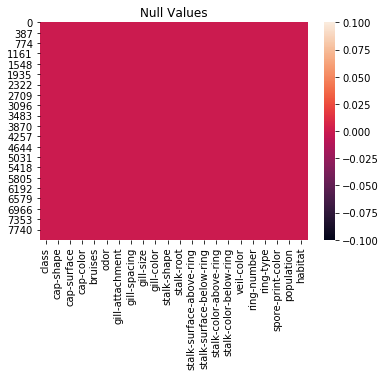

In [19]:
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()  

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Checking the shape of the dataframe

In [6]:
df.shape

(8124, 23)

Checking unique value count for less than or equal to 1

In [7]:
df.columns[df.nunique()<=1]  

Index(['veil-type'], dtype='object')

Eliminating the column with only single unique value

In [8]:
df.drop('veil-type',axis=1,inplace=True)

In [10]:
df.shape #checking the shape

(8124, 22)

In [13]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

Since all are object variables we must convert them using encoder

In [14]:
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
df=df.apply(LE.fit_transform)

In [16]:
df #after encoding 

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


In [18]:
df.corr() #multivariate analysis

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.334593,-0.298801,-0.154003,-0.146730,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


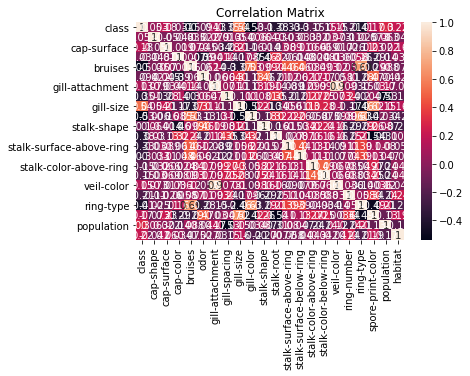

In [111]:
corr_mat=df.corr()
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [42]:
y=df["class"]

In [24]:
x=df.drop('class',axis=1) #Assigning independent variables to 'x'

In [44]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predlr=LR.predict(x_test)
    acc=accuracy_score(y_test,predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"on Random_state",maxRS)


Best accuracy is 0.9578515479298769 on Random_state 167


In [45]:
#Train test splt
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=167)

In [46]:
#RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
rf.feature_importances_

array([0.00581774, 0.00972562, 0.01356837, 0.03655278, 0.16564662,
       0.00103869, 0.03543241, 0.09651177, 0.15709573, 0.0238535 ,
       0.06447985, 0.04705471, 0.04100388, 0.01498507, 0.01414519,
       0.00241315, 0.01250319, 0.06361796, 0.09556718, 0.07247179,
       0.02651479])

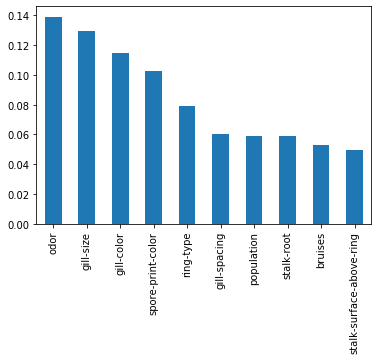

In [31]:
# Top 10 important variables influencing the target variable

feat_importances = pd.Series(rf.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).plot(kind='bar')
#odor is the most important variable

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

train_predict=rf.predict(x_train)
accuracy_score(y_train,train_predict)


1.0

In [49]:
confusion_matrix(y_train,train_predict)

array([[2784,    0],
       [   0, 2659]], dtype=int64)

In [77]:
#RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
test_predict=rf.predict(x_test)
print('accuracy score is',accuracy_score(y_test,test_predict))  #accuracy score
print(confusion_matrix(y_test,test_predict))                    #confusion matrix
print(classification_report(y_test,test_predict))               #classification report

accuracy score is 1.0
[[1424    0]
 [   0 1257]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1424
           1       1.00      1.00      1.00      1257

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



In [78]:
#LogisticRegression

LR = LogisticRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print('accuracy score is',accuracy_score(y_test,predlr))  #accuracy score
print(confusion_matrix(y_test,predlr))                    #confusion matrix
print(classification_report(y_test,predlr))               #classification report

accuracy score is 0.9578515479298769
[[1376   48]
 [  65 1192]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1424
           1       0.96      0.95      0.95      1257

    accuracy                           0.96      2681
   macro avg       0.96      0.96      0.96      2681
weighted avg       0.96      0.96      0.96      2681



In [108]:
#DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print('accuracy score is',accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

accuracy score is 1.0
[[1424    0]
 [   0 1257]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1424
           1       1.00      1.00      1.00      1257

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



In [84]:
#Support Vector Classifier
svc=SVC(kernel="poly") 
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print('accuracy score is',accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

accuracy score is 0.9977620290936218
[[1424    0]
 [   6 1251]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1424
           1       1.00      1.00      1.00      1257

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



In [81]:
#MultinomialNB

from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
predmnb=mnb.predict(x_test)
print('accuracy score is',accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

accuracy score is 0.8082804923535994
[[1335   89]
 [ 425  832]]
              precision    recall  f1-score   support

           0       0.76      0.94      0.84      1424
           1       0.90      0.66      0.76      1257

    accuracy                           0.81      2681
   macro avg       0.83      0.80      0.80      2681
weighted avg       0.83      0.81      0.80      2681



In [82]:
#KNeighborsClassifier

from sklearn.neighbors  import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print('accuracy score is',accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

accuracy score is 0.9988810145468109
[[1423    1]
 [   2 1255]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1424
           1       1.00      1.00      1.00      1257

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



Cross validation

In [101]:
from sklearn.model_selection import cross_val_score

In [102]:
rfcv = cross_val_score(rf,x,y,cv=5)
print("Cross validation score of randomforest Classifier model is",rfcv.mean())

Cross validation score of randomforest Classifier model is 0.8969405835543768


In [103]:
LRcv = cross_val_score(LR,x,y,cv=5)
print("Cross validation score of Logistic Regression model is",LRcv.mean())

Cross validation score of Logistic Regression model is 0.8403339901477832


In [104]:
dtccv = cross_val_score(dtc,x,y,cv=5)
print("Cross validation score of Decision Tree Classifier model is",dtccv.mean())

Cross validation score of Decision Tree Classifier model is 0.9325229253505116


In [105]:
svccv = cross_val_score(svc,x,y,cv=5)
print("Cross validation score of Support Vector Classifier model is",svccv.mean())

Cross validation score of Support Vector Classifier model is 0.8486774535809019


In [106]:
mnbcv = cross_val_score(mnb,x,y,cv=5)
print("Cross validation score of MultinomialNB model is",mnbcv.mean())

Cross validation score of MultinomialNB model is 0.7267300492610838


In [107]:
knncv = cross_val_score(knn,x,y,cv=5)
print("Cross validation score of KNeighborsClassifier model is",knncv.mean())

Cross validation score of KNeighborsClassifier model is 0.8815549071618036


DTC has the least difference between accuracy score and cross validation score. So we conclude Decision Tree Classifier to be
the best model

Saving the best model

In [110]:
import joblib
joblib.dump(dtc,'Mushroom.obj') #save the model as object file

['Mushroom.obj']